In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('scores_data.csv')

df.columns = df.columns.str.strip()

if df['Score'].dtype == 'O':
    df['Score'] = df['Score'].astype(str).str.replace(' / 7', '').astype(float)
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6.0
1,AI_ELITE_7,uid_148,6.0
2,AI_ELITE_7,uid_147,7.0
3,AI_ELITE_7,uid_146,7.0
4,AI_ELITE_7,uid_145,4.0
...,...,...,...
144,AI_ELITE_4,uid_5,4.0
145,AI_ELITE_4,uid_4,4.0
146,AI_ELITE_4,uid_3,4.0
147,AI_ELITE_4,uid_2,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


In [4]:
# Descriptive Statistics by Batch
print("Descriptive Statistics by Batch")
print(df.groupby('Batch')['Score'].describe())

Descriptive Statistics by Batch
            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


Batch
AI_ELITE_7    5.056604
AI_ELITE_6    4.229167
AI_ELITE_4    3.791667
Name: Score, dtype: float64


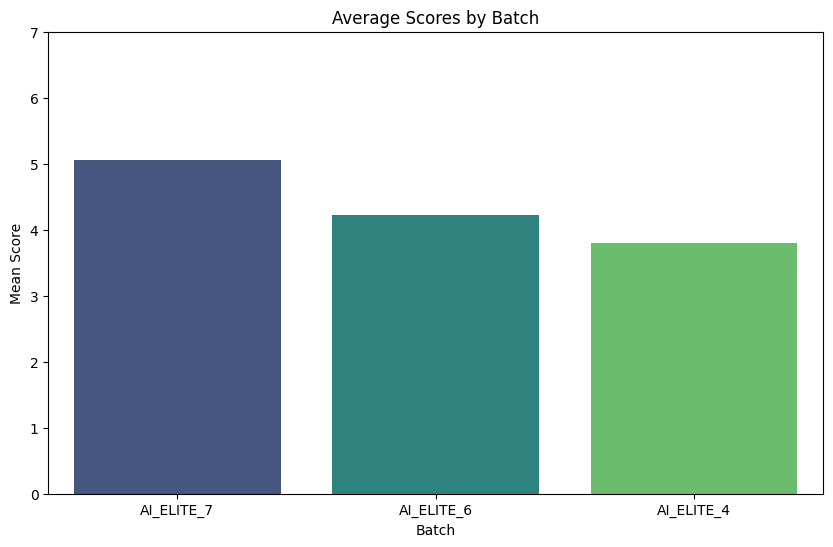

In [5]:
# Average Score
mean_scores = df.groupby('Batch')['Score'].mean().sort_values(ascending=False)
print(mean_scores)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette='viridis')
plt.title('Average Scores by Batch')
plt.xlabel('Batch')
plt.ylabel('Mean Score')
plt.ylim(0, 7)
plt.show()

In [6]:
# Standard Deviation
std_dev = df.groupby('Batch')['Score'].std().sort_values()
print("--- Standard Deviation (Lower is More Consistent) ---")
print(std_dev)

--- Standard Deviation (Lower is More Consistent) ---
Batch
AI_ELITE_4    1.443376
AI_ELITE_7    1.446682
AI_ELITE_6    1.640441
Name: Score, dtype: float64


In [7]:
# Top scorers
max_score = df['Score'].max()
top_scorers_df = df[df['Score'] == max_score]
print(top_scorers_df)

          Batch  User_ID  Score
2    AI_ELITE_7  uid_147    7.0
3    AI_ELITE_7  uid_146    7.0
5    AI_ELITE_7  uid_144    7.0
7    AI_ELITE_7  uid_142    7.0
15   AI_ELITE_7  uid_134    7.0
16   AI_ELITE_7  uid_133    7.0
17   AI_ELITE_7  uid_132    7.0
19   AI_ELITE_7  uid_130    7.0
24   AI_ELITE_7  uid_125    7.0
35   AI_ELITE_7  uid_114    7.0
63   AI_ELITE_6   uid_86    7.0
67   AI_ELITE_6   uid_82    7.0
74   AI_ELITE_6   uid_75    7.0
78   AI_ELITE_6   uid_71    7.0
98   AI_ELITE_6   uid_51    7.0
101  AI_ELITE_4   uid_48    7.0
105  AI_ELITE_4   uid_44    7.0
139  AI_ELITE_4   uid_10    7.0


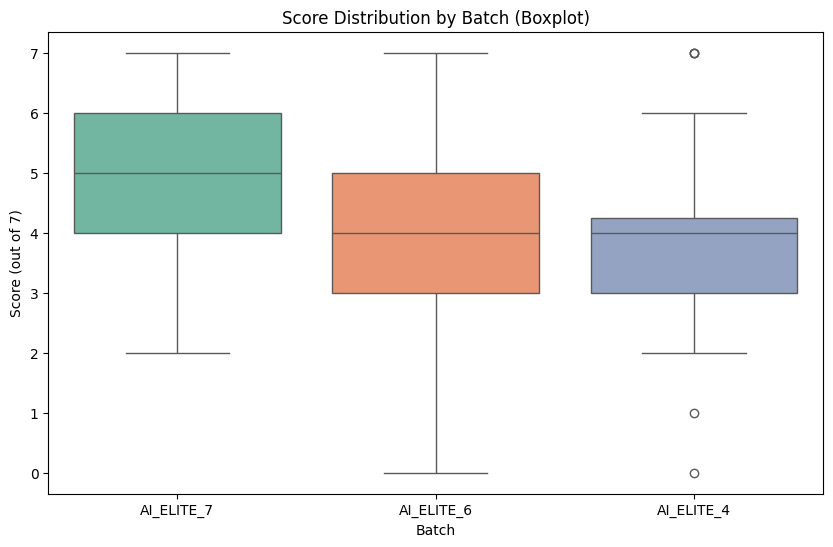

In [8]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=df, palette="Set2")
plt.title('Score Distribution by Batch (Boxplot)')
plt.ylabel('Score (out of 7)')
plt.show()

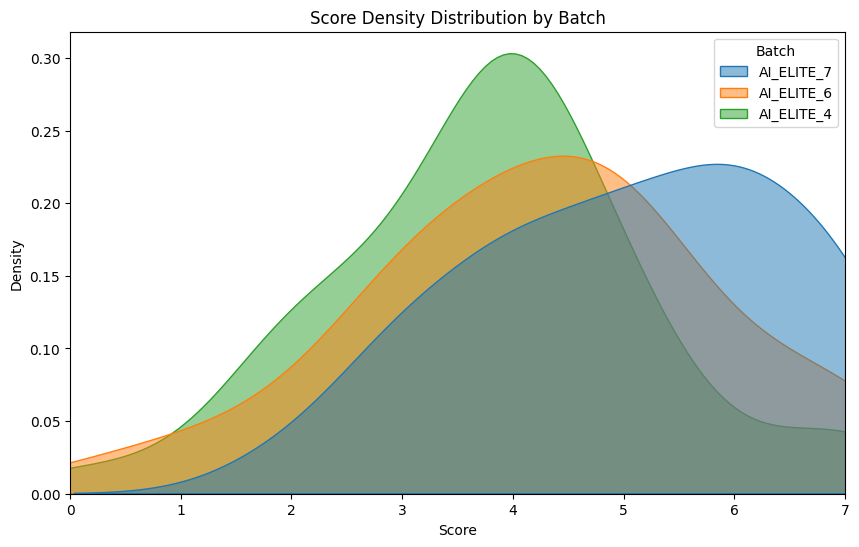

In [9]:
# Density Plot (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Score', hue='Batch', fill=True, common_norm=False, palette="tab10", alpha=0.5)
plt.title('Score Density Distribution by Batch')
plt.xlabel('Score')
plt.xlim(0, 7)
plt.show()